# Task - 2: Prediction using Unsupervised ML
                                                 -Chinta Satya Nandikeswara rao

Aim: From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.

In [111]:
#importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [112]:
#Load the Iris dataset
df = pd.read_csv("Iris.csv")
df.drop(['Id'],axis=1,inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [113]:
df.shape

(150, 5)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [115]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [116]:
df.drop_duplicates(inplace=True)

In [117]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df['Species'].value_counts()

1    50
2    49
0    48
Name: Species, dtype: int64

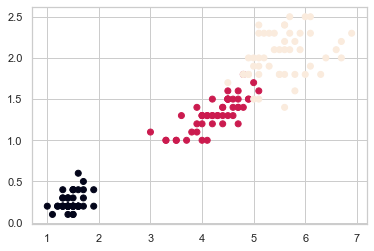

In [118]:
plt.scatter(df['PetalLengthCm'],df['PetalWidthCm'],c=df.Species.values)

# Data Visualization

<AxesSubplot:>

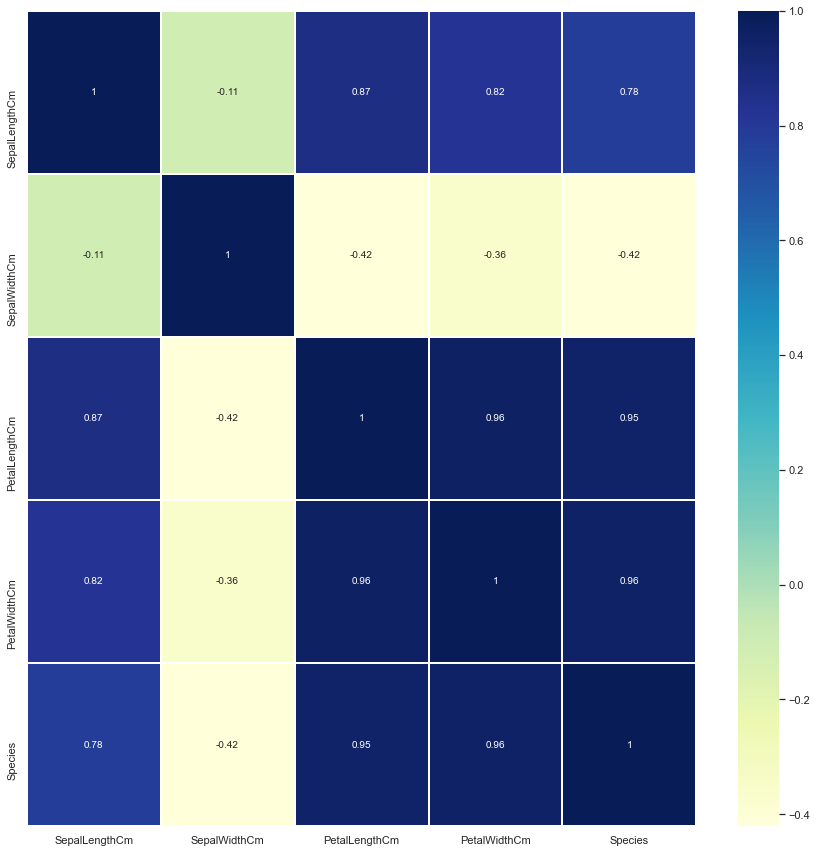

In [119]:
fig = plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),linewidths=1,annot=True, cmap="YlGnBu")

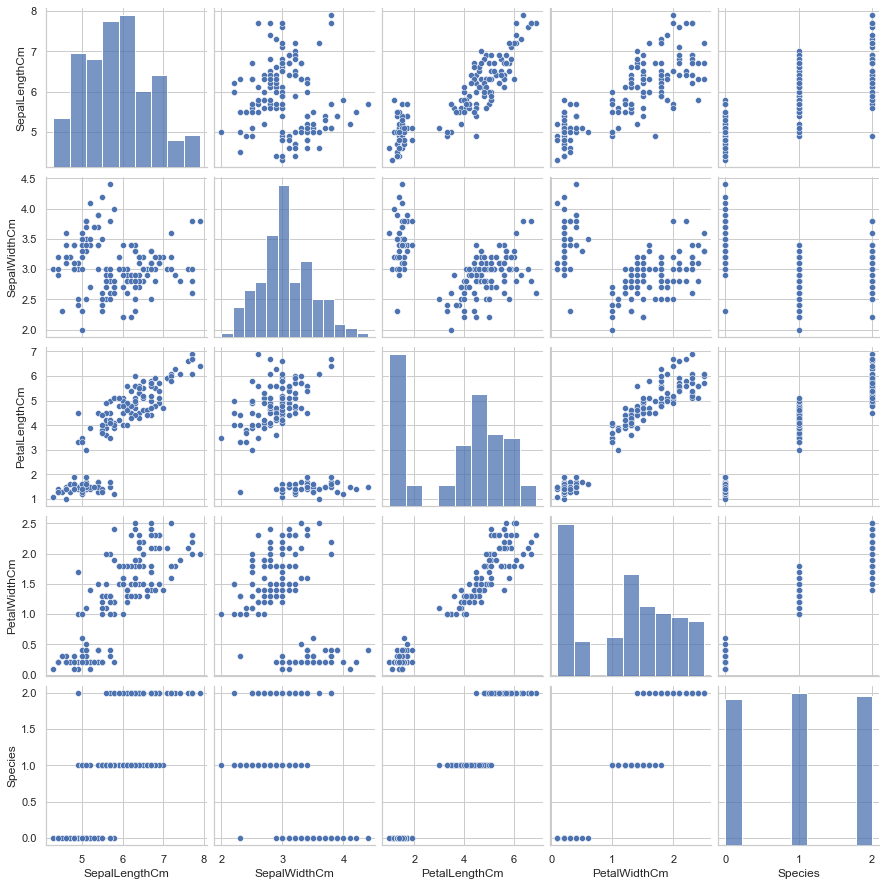

In [120]:
sns.pairplot(df)

In [121]:
df=df.iloc[:, [0,1,2,3]].values

# Using Elbow Graph to find optimum no.of Clusters

In [122]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++',random_state=42)
    kmeans.fit(df)
    #inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

C:\Users\nandu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


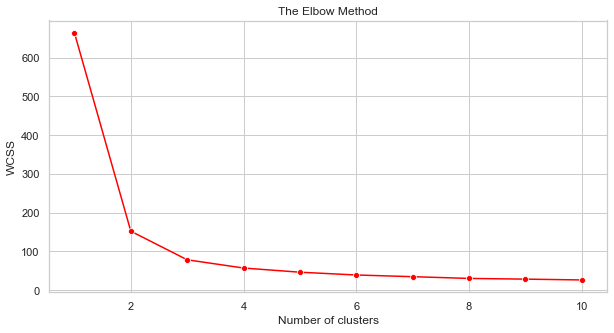

In [123]:
plt.figure(figsize=(10,5))
sns.set(style='whitegrid')
sns.lineplot(range(1,11),wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The optimum value of K would be 3.

In [124]:
kmeans = KMeans(n_clusters = 3, init='k-means++',random_state = 5)
y_kmeans = kmeans.fit_predict(df)

# Visualizing the Clusters

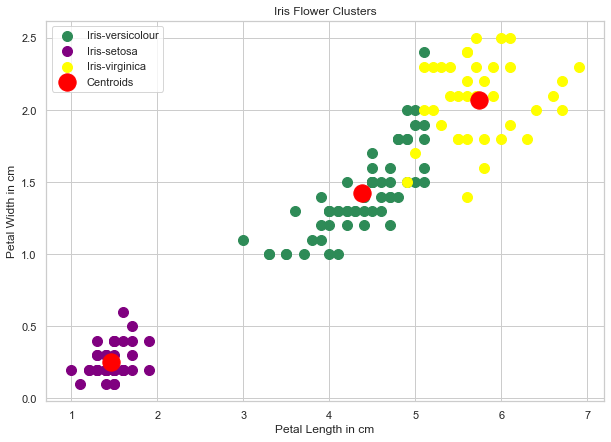

In [125]:
fig = plt.figure(figsize=(10,7))
plt.title('CLusters with Centroids',fontweight = 'bold',fontsize = 20)
plt.scatter(df[y_kmeans==0,2],df[y_kmeans==0,3],s=100,c='seagreen',label='Iris-versicolour')
plt.scatter(df[y_kmeans==1,2],df[y_kmeans==1,3],s=100,c='purple',label='Iris-setosa')
plt.scatter(df[y_kmeans==2,2],df[y_kmeans==2,3],s=100,c='yellow',label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:,3],s=300,c='red',label='Centroids')
plt.title('Iris Flower Clusters')
plt.ylabel('Petal Width in cm')
plt.xlabel('Petal Length in cm')
plt.legend()

## Task 2 Completed!
